# Orbits of rotations

By default, we will represent points in the circle by numbers in the interval $[0,1)$. The following function `to_unit_circle` converts from these coordinates to the unit circle.

Here is a Sage version of the function:

In [1]:
to_unit_circle(x) = (cos(2*pi*x), sin(2*pi*x))

Here is a way to write the function more in the spirit of Python:

In [2]:
def to_unit_circle(x):
    return (cos(2*pi*x), sin(2*pi*x))

The two ways of writing a function should be roughly equivalent in this notebook, but the Sage version allows you to do somethings you can't do in Python such as take derivatives.

Here is an example of the use of the function above:

In [3]:
to_unit_circle(0)

(1, 0)

Note that the output of the last command in a block is automatically printed in Jupyter.

In [4]:
to_unit_circle(1/4)

(0, 1)

Below we define a rotation of the interval $[0,1)$ by $\frac{2}{5}$.

In [5]:
T(x) = x + 2/5 - floor(x + 2/5)

Here we test it:

In [6]:
T(0)

2/5

In [7]:
T(4/5)

1/5

The following is a function that computes the forward orbit of $x$ under $T$ up until time $N$. So, this returns the list of values
$$[x,T(x), \ldots, T^N(x)].$$

In [8]:
def forward_orbit(x, T, N):
    orbit = [x] # Start of the orbit.
    y = x
    for i in range(N):
        y = T(y) # Redefine y to be T(y)
        orbit.append(y) # Add y at the end of the orbit.
    return orbit

Here we see that $0$ has a periodic orbit of least period $5$:

In [9]:
orbit = forward_orbit(0,T,5)
orbit

[0, 2/5, 4/5, 1/5, 3/5, 0]

In [10]:
for x in orbit:
    print(x)

0
2/5
4/5
1/5
3/5
0


The following converts orbit into circle coordinates:

In [11]:
circle_orbit = [to_unit_circle(x) for x in orbit]
circle_orbit

[(1, 0),
 (-1/4*sqrt(5) - 1/4, 1/4*sqrt(-2*sqrt(5) + 10)),
 (1/4*sqrt(5) - 1/4, -1/4*sqrt(2*sqrt(5) + 10)),
 (1/4*sqrt(5) - 1/4, 1/4*sqrt(2*sqrt(5) + 10)),
 (-1/4*sqrt(5) - 1/4, -1/4*sqrt(-2*sqrt(5) + 10)),
 (1, 0)]

We can plot the `circle_orbit`:

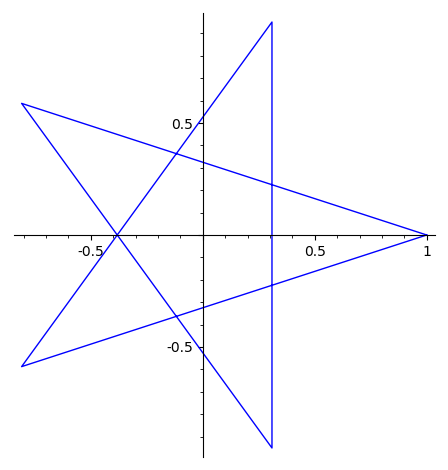

In [12]:
line2d(circle_orbit, aspect_ratio=1)

Here we plot two orbits:

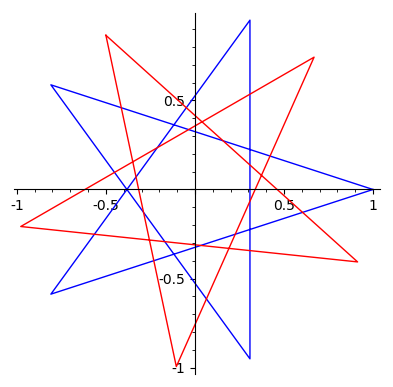

In [13]:
plt1 = line2d(circle_orbit, aspect_ratio=1)
orbit2 = forward_orbit(1/3, T, 5)
circle_orbit2 = [to_unit_circle(x) for x in orbit2]
plt2 = line2d(circle_orbit2, aspect_ratio=1, color="red")
plt1 + plt2 # Addition combines plots

## A more sophisticated way to deal with rotations.

The following function gives returns the rotation by alpha.

In [14]:
def rotation(alpha):
    def T(x):
        val = x+alpha
        return val - floor(val)
    return T

In [15]:
R = rotation(5/8)

Below we plot an orbit:

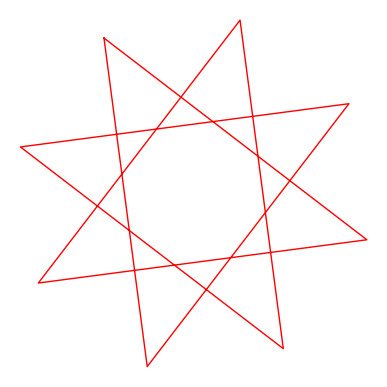

In [16]:
orbit = forward_orbit(1/3, R, 8)
circle_orbit = [to_unit_circle(x) for x in orbit]
line2d(circle_orbit, aspect_ratio=1, color="red", axes=False)

## An irrational orbit:

We will now consider the rotation by $\sqrt{2}-1$.

In [17]:
alpha = sqrt(2)-1
alpha

sqrt(2) - 1

The following defines $T$.

In [18]:
T = rotation(alpha)

In [19]:
T(0)

sqrt(2) - 1

We compute an orbit of length 100 and then plot it.

In [20]:
orbit = forward_orbit(0,T,100)

In [21]:
circle_orbit = [to_unit_circle(x) for x in orbit]

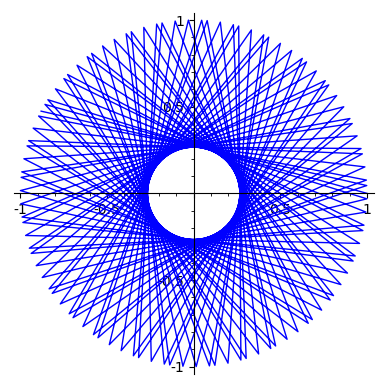

In [22]:
line2d(circle_orbit, aspect_ratio=1)

<i>Remark.</i> The above code ran into problems when I defined $T$ to be

<code>T(x) = x + alpha - floor(x + alpha)</code>

Now we compute and plot an orbit of length 1000.

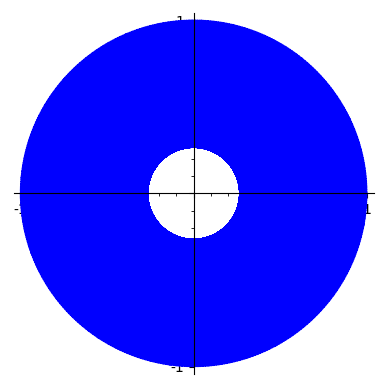

In [23]:
orbit = forward_orbit(0,T,1000)
circle_orbit = [to_unit_circle(x) for x in orbit]
line2d(circle_orbit, aspect_ratio=1)

Of course, the full infinitely long forward orbit of any point is dense, as we will prove in class. Also see Devaney's Theorem 3.13.